In [1]:
import numpy as np
import pandas as pd
import collections

## load data

In [2]:
df = pd.read_csv('training_data.csv')
TestFile = pd.read_csv('(name)_score.csv')

In [3]:
#change the form of column symptoms
for i in range(len(df)):
    if type(df[i:i+1].symptoms[i])==float:
        df[i:i+1].symptoms[i] = 'N'
        continue 
    temp = df[i:i+1].symptoms[i].split(',')
    df[i:i+1].symptoms[i] = temp
#change the form of column symptoms
for i in range(len(TestFile)):
    if type(TestFile[i:i+1].symptoms[i])==float:
        TestFile[i:i+1].symptoms[i] = 'N'
        continue 
    temp = TestFile[i:i+1].symptoms[i].split(',')
    TestFile[i:i+1].symptoms[i] = temp

/Users/sean/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis

In [4]:
df.describe()

,id,gleason_score,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,...,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
count,15385.000000,15065.000000,14637.000000,15220.000000,14021.000000,14068.000000,13799.000000,13799.000000,13799.000000,13799.000000,...,13799.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000
mean,7693.000000,7.299967,76.901073,3.480486,69.151202,176.800043,0.423871,0.211899,0.068773,0.054932,...,2.552721,0.537472,0.342866,0.663438,0.238869,0.245044,0.174586,0.778616,0.896913,0.432304
std,4441.411281,1.933395,9.617403,0.953454,1.127451,17.211988,0.613645,0.460531,0.253077,0.227855,...,1.618253,0.498610,0.474683,0.472549,0.426406,0.430127,0.379625,0.415192,0.304083,0.495412
min,1.000000,3.000000,32.000000,1.000000,65.000000,118.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3847.000000,6.000000,71.000000,3.000000,68.000000,166.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,7693.000000,7.000000,78.000000,4.000000,69.000000,174.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,11539.000000,9.000000,84.000000,4.000000,70.000000,184.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,15385.000000,14.000000,107.000000,4.000000,73.000000,343.000000,5.000000,4.000000,1.000000,1.000000,...,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
TestFile.describe()

,id,gleason_score,age,race,height,weight,family_history,first_degree_history,previous_cancer,smoker,...,tea,rd_thrpy,h_thrpy,chm_thrpy,cry_thrpy,brch_thrpy,rad_rem,multi_thrpy,survival_1_year,survival_7_years
count,11531.000000,11292.000000,10883.000000,11410.000000,10488.000000,10490.000000,10360.000000,10360.000000,10360.000000,10360.000000,...,10360.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,11531.000000,5818.000000,0.0
mean,25766.000000,7.274265,76.833777,3.482734,69.154653,176.965014,0.420849,0.213514,0.074614,0.058301,...,2.589189,0.542017,0.343335,0.659180,0.239528,0.246900,0.172405,0.784494,0.896872,NaN
std,3328.857311,1.942391,9.601470,0.953430,1.160651,17.460884,0.612252,0.457659,0.262780,0.234323,...,1.624684,0.498253,0.474843,0.474006,0.426814,0.431227,0.377748,0.411191,0.304152,NaN
min,20001.000000,3.000000,35.000000,1.000000,65.000000,123.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,22883.500000,6.000000,71.000000,4.000000,68.000000,166.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
50%,25766.000000,7.000000,78.000000,4.000000,69.000000,173.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
75%,28648.500000,9.000000,84.000000,4.000000,70.000000,185.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
max,31531.000000,14.000000,108.000000,4.000000,74.000000,317.000000,5.000000,5.000000,1.000000,1.000000,...,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


### sanity check
if there's any bug about the survival

In [6]:
df[(df['survival_1_year'] == 0) & (df['survival_7_years'] == 1)].shape

(0, 33)

/Users/sean/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/sean/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/sean/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


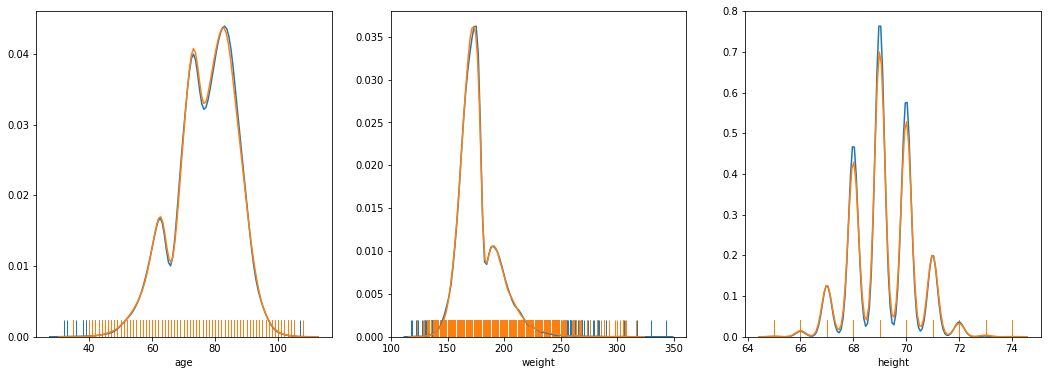

In [9]:
#density plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#f, axes = plt.subplots(2, 3, figsize=(18, 6), sharex=True)
fig, (ax1, ax2, ax3)= plt.subplots(nrows=1, ncols=3, figsize=(18,6))
#fig, (axe1, axe2, axe3)= plt.subplots(nrows=1, ncols=3, figsize=(18,6))
# sns.countplot(x="minor", hue="label", data=Data, ax=ax1)
# sns.countplot(x="major", hue="label", data=Data, ax=ax2);
sns.distplot(df['age'], rug=True, hist=False, ax=ax1);
sns.distplot(TestFile['age'], rug=True, hist=False, ax=ax1);
sns.distplot(df['weight'], rug=True, hist=False, ax=ax2);
sns.distplot(TestFile['weight'], rug=True, hist=False, ax=ax2);
sns.distplot(df['height'], rug=True, hist=False, ax=ax3);
sns.distplot(TestFile['height'], rug=True, hist=False, ax=ax3);


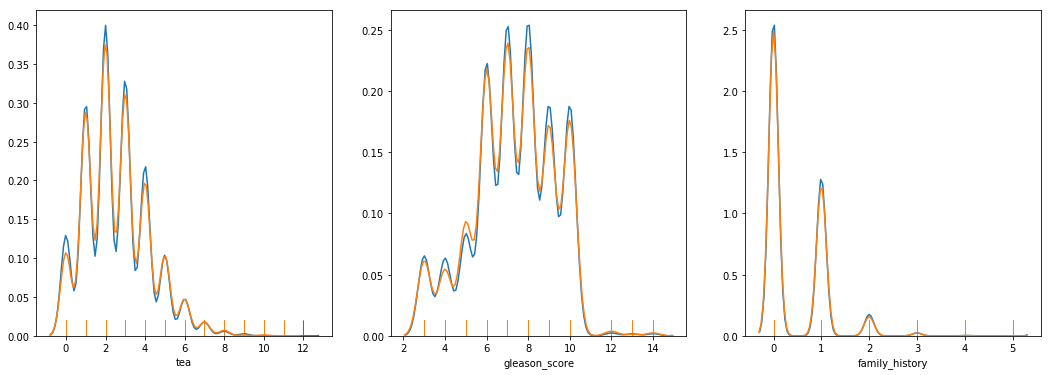

In [10]:
fig, (axe1, axe2, axe3)= plt.subplots(nrows=1, ncols=3, figsize=(18,6))

sns.distplot(df['tea'], rug=True, hist=False,  ax=axe1);
sns.distplot(TestFile['tea'], rug=True, hist=False,  ax=axe1);
sns.distplot(df['gleason_score'], rug=True, hist=False, ax=axe2);
sns.distplot(TestFile['gleason_score'], rug=True, hist=False, ax=axe2);
sns.distplot(df['family_history'], rug=True, hist=False, ax=axe3);
sns.distplot(TestFile['family_history'], rug=True, hist=False, ax=axe3);

### deal with the feature 'symptoms'

In [11]:
#reference: https://datascience.stackexchange.com/questions/8253/how-to-binary-encode-multi-valued-categorical-variable-from-pandas-dataframe?newreg=460f62493bf84e6998be533676ad47b5
#training set
df1 = df['symptoms'].apply(collections.Counter)
symptoms_table_df1 = pd.DataFrame.from_records(df1).fillna(value=0)
#testfile
TestFile1 = TestFile['symptoms'].apply(collections.Counter)
symptoms_table_TestFile1 = pd.DataFrame.from_records(TestFile1).fillna(value=0)

## check lable balance

In [13]:
Y = df['survival_7_years']

In [14]:
#labels ratio
ratio = round(sum(Y)/len(Y),4)
print('the percentage of knuckle in the label is :', ratio)

the percentage of knuckle in the label is : 0.4323


In [15]:
#features on hot encoding
columns = ['t_score', 'n_score', 'm_score', 'stage', 'race', 'side']
for col in columns:
    temp = pd.get_dummies(df[col], prefix = col)
    df = pd.concat((df, temp), axis = 1)
df2 = df.drop(columns, axis=1)
df2 = df2.drop(['id', 'diagnosis_date', 'symptoms', 'survival_7_years'], axis=1)

for col in columns:
    temp = pd.get_dummies(TestFile[col], prefix = col)
    TestFile = pd.concat((TestFile, temp), axis = 1)
TestFile2 = TestFile.drop(columns, axis=1)
TestFile2 = TestFile2.drop(['id', 'diagnosis_date', 'symptoms', 'survival_7_years'], axis=1)

In [16]:
Train = df2.join(symptoms_table_df1)
Test = TestFile2.join(symptoms_table_TestFile1)

In [17]:
Train = Train.fillna(Train.mean())
Test = Test.fillna(Train.mean())

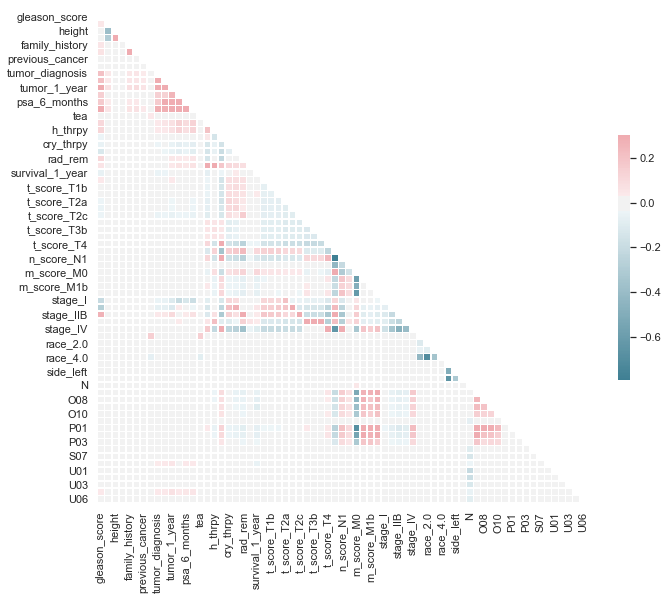

In [18]:
%matplotlib inline
#Heatmap reference: https://stackoverflow.com/questions/36560829/seaborn-heatmap-with-frames
from string import ascii_letters
sns.set(style="white")
# Compute the correlation matrix
corr = Train.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## prediction model

In [19]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
rf = RandomForestClassifier(n_estimators = 200, max_features='auto', criterion = 'entropy', oob_score = True)
rf.fit(Train, Y)

print('out of bag score')
print(rf.oob_score_)

/Users/sean/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


out of bag score
0.6661033474163146


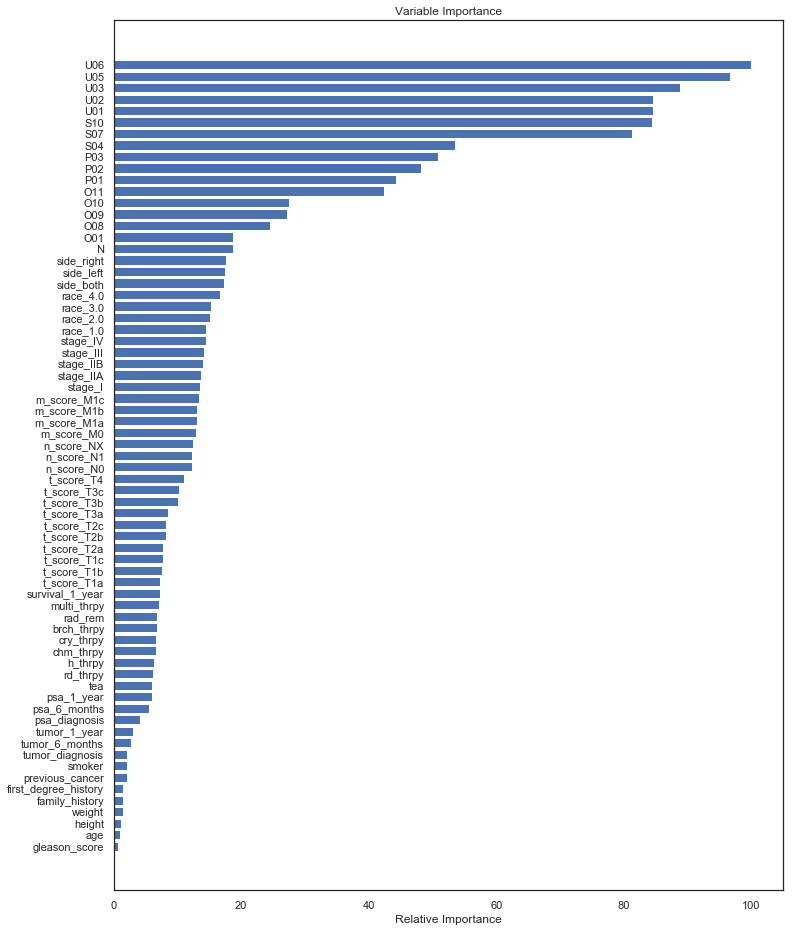

In [20]:
import matplotlib.pyplot as plt
# Plot feature importance
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 16))
#plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, Train.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [29]:
#split data into training group and testing group
from sklearn.model_selection import train_test_split
y = Y
X = Train
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=56, shuffle = True)

In [30]:
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Flatten Data
from sklearn.preprocessing import StandardScaler, RobustScaler
rob_scaler = RobustScaler()
# Use robust scaler to reduce outliers
X_train_R = rob_scaler.fit_transform(X_train)
X_test_R = rob_scaler.transform(X_test)
X_R = rob_scaler.transform(X)
Test_R = rob_scaler.transform(Test)

In [31]:
#SVM model
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_R, y_train)
svm_predictions = svm_clf.predict(X_test_R) # Save prediction

#print(svm_clf.score(X_test_R, y_test))
scores = cross_val_score(svm_clf, X_train_R, y_train, cv=10)

print("cross validation score")
print(scores)
print("cross validation accuracy: %0.4f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print("AUC Score (Test): %f" % roc_auc_score(y_test, svm_predictions))
print("Testset report")
print(mt.classification_report(y_test, svm_predictions))
print("Testset confusion matrix")
print(mt.confusion_matrix(y_test, svm_predictions))
print("Testset accuracy")
print(round(accuracy_score(svm_predictions, y_test),6))

cross validation score
[0.64204545 0.67207792 0.65393989 0.68237206 0.64987815 0.67424858
 0.65284553 0.6601626  0.63821138 0.66422764]
cross validation accuracy: 0.6590 (+/- 0.03)

AUC Score (Test): 0.654286
Testset report
             precision    recall  f1-score   support

          0       0.69      0.72      0.71      1732
          1       0.62      0.59      0.60      1345

avg / total       0.66      0.66      0.66      3077

Testset confusion matrix
[[1253  479]
 [ 558  787]]
Testset accuracy
0.662983


In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=10, random_state=56, kind = 'svm')
X_res_train, y_res_train = sm.fit_sample(X_train_R, y_train)
svm_sm_clf = SVC()
svm_sm_clf.fit(X_res_train, y_res_train)
svm_sm_predictions = svm_clf.predict(X_test_R)
print(svm_sm_clf.score(X_test_R, y_test))
scores = cross_val_score(svm_sm_clf, X_test_R, y_test, cv=10)
print(scores)
print("cross validation accuracy: %0.4f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print(mt.classification_report(y_test, svm_sm_predictions)) 
print(mt.confusion_matrix(y_test, svm_sm_predictions))

0.6431589210269744
[0.6763754  0.66019417 0.63311688 0.63636364 0.61038961 0.64820847
 0.65472313 0.6286645  0.67752443 0.60586319]
cross validation accuracy: 0.6431 (+/- 0.05)

             precision    recall  f1-score   support

          0       0.69      0.72      0.71      1732
          1       0.62      0.59      0.60      1345

avg / total       0.66      0.66      0.66      3077

[[1253  479]
 [ 558  787]]


In [33]:
#xgboost model
from xgboost import XGBClassifier
import os
import warnings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True'

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_R, y_train)

xgb_predictions = xgb_clf.predict(X_test_R)

scores = cross_val_score(xgb_clf, X_train_R, y_train, cv=5)

print("cross validation score")
print(scores)
print("cross validation accuracy: %0.4f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))
print("AUC Score (Test): %f" % roc_auc_score(y_test, xgb_predictions))
print("Testset report")
print(mt.classification_report(y_test, xgb_predictions))
print("Testset confusion matrix")
print(mt.confusion_matrix(y_test, xgb_predictions))
print("Testset accuracy")
print(round(accuracy_score(xgb_predictions, y_test),6))

cross validation score
[0.68209501 0.68805849 0.6635514  0.67899228 0.67370987]
cross validation accuracy: 0.6773 (+/- 0.02)

AUC Score (Test): 0.684600
Testset report
             precision    recall  f1-score   support

          0       0.74      0.68      0.71      1732
          1       0.62      0.69      0.66      1345

avg / total       0.69      0.68      0.68      3077

Testset confusion matrix
[[1170  562]
 [ 412  933]]
Testset accuracy
0.683458


## model selection
choose the random forest model(which has highest accuracy performance)
apply the model to Score data and get the test result, save it to 'XinXu_score.csv'

In [36]:
#get the test result and save it
TestPredictions = xgb_clf.predict(Test_R)
TestDF = pd.read_csv('(name)_score.csv')
TestDF.survival_7_years = TestPredictions
TestDF.to_csv('XinXu_score.csv',index = False)